# Importing Libraries and Data

In [63]:
import numpy as np #numpy
import pandas as pd #panda
import re #regex library

#Preprocessing
import nltk #natural language processing tool kit
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from matplotlib import pyplot as plt

#For Model Building
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.naive_bayes import BernoulliNB

We have used this dataset for our Model. This dataset is collected by scraping the imdb website

[IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)



In [64]:
df = pd.read_csv("/content/IMDB Dataset.csv")

In [65]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [68]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# Text Preprocessing or Text Cleaning
```
Removing missing values if any.
Removing html tags.
Removing Special Characters.
Converting every text to lowe case.
Removing stop words.
Stemming.

```

###Removing missing values if any.

In [69]:
df.shape #50k rows and 2 columns

(50000, 2)

In [70]:
#We are going to work on only 30k random sample of data as 50k data is too cpu intense. 
#If you have good cpu of over 16GB ram, you can use whole 50k dataset as that will give more precise results

df = df.sample(n=30000,replace=True,ignore_index=True)

In [71]:
df.info() #as we can see there is no null values. so the data is already clean and we passed our first step in data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     30000 non-null  object
 1   sentiment  30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


In [72]:
#labelling the ouput 0 and 1 as this is binary classification problem
df['sentiment'].replace({'positive':1, 'negative':0}, inplace=True) 

In [73]:
df.head()

,review,sentiment
0,This film is advertised as a clever romantic c...,0
1,"Yes, the video cover of this movie made me wan...",0
2,Burt Reynolds stars as an undercover cop who i...,1
3,Good footage of World War I-era ships and plan...,1
4,If the caper genre owes a lot to Walter Huston...,1


### Removing html tags, special characters and converting reviews to lowecase

In [74]:
#removing html tags by using regex expression. we are replacing anything that matches the pattern <.*?> with empty string in the review
# re is regex library in python and anonymous function lambda is used.
df['review'] = df['review'].apply(lambda x: re.sub( re.compile('<.*?>'),'',x))

In [75]:
df['review'] = df['review'].apply(lambda x: x.lower()) #convert reviews to lowecase to avoid duplicate analysis

In [76]:
df['review'][0]

'this film is advertised as a clever romantic comedy. it is neither clever nor romantic and it is definitely not an effective comedy. the fortunes of the well meaning yet pathetic character, "tom", oscillate from one extremely embarrassing disaster to another. the only saving graces are the competent performance by toni collete and the frequency with which we glimpse paltrow\'s pleasant face. overall, to be avoided!'

In [77]:
#Removing special characters. regex expression [^A-Za-z0-9.]+ matches anything that is not alphanumeric
df['review'] = df['review'].apply(lambda x: re.sub('[^A-Za-z0-9.]+',' ',x))

In [78]:
df['review'][0]

'this film is advertised as a clever romantic comedy. it is neither clever nor romantic and it is definitely not an effective comedy. the fortunes of the well meaning yet pathetic character tom oscillate from one extremely embarrassing disaster to another. the only saving graces are the competent performance by toni collete and the frequency with which we glimpse paltrow s pleasant face. overall to be avoided '

### Removing StopWords

Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead. Inshort, stopwords contribute nothing to our analysis. it's You can google to learn more.

In [30]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
StopWords = stopwords.words('english') #these are stopwords
print(StopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#filtering crucial stopwords that may require in Sentiment Analysis
filters = ['up', 'down','out', 'on', 'off','but','no', 'nor', 'not', 'don', "don't","aren't",'ain', 'aren', 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
filteredStopWords = [word for word in StopWords if word not in filters]
print(filteredStopWords)

Before Removing these filteredWords let's look most occured words in our data.
We should also remove overlapping words or words that repeat in both positive as well as negative reviews which don't contribute to our prediction. 
Some of words i can think of is movie, show, series

In [79]:
wc = WordCloud(width=600, height=600, min_font_size=10, background_color='white')

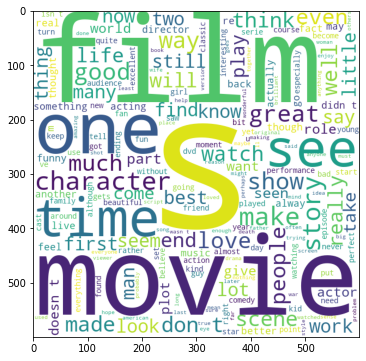

In [88]:
positive_wc = wc.generate(df[df['sentiment'] == 1]['review'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

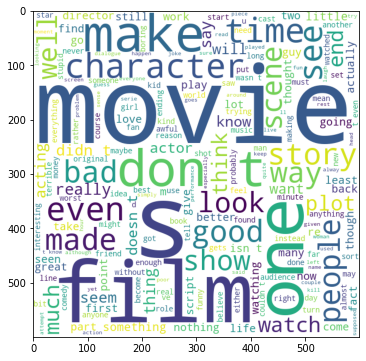

In [89]:
negative_wc = wc.generate(df[df['sentiment'] == 0]['review'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [126]:
#Removing StopWords
filteredStopWords.extend(["movie","show","film","character","one","watch"])
df['review'] = df['review'].apply(lambda x:  [word for word in x.split() if word not in filteredStopWords] )

###Stemming

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. This helps to avoid treating feature variations as different features, thus reducing the number of extracted features.
There is a alternate process called Lemmatization which is similar to Stemming but have more meaning weight to it unlike stemming

In [128]:
ps = PorterStemmer()

In [129]:
df['review'] = df['review'].apply(lambda x:  ' '.join([ps.stem(word) for word in x]) ) #After stemming join the list back to string

In [130]:
df['review'][0]

'advertis clever romant comedy. neither clever nor romant definit not effect comedy. fortun well mean yet pathet tom oscil extrem embarrass disast another. save grace compet perform toni collet frequenc glimps paltrow pleasant face. overal avoid'

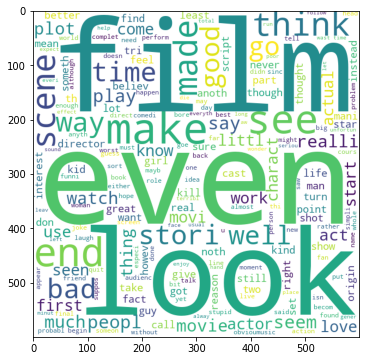

In [131]:
#Let's check our most occured words again

negative_wc = wc.generate(df[df['sentiment'] == 0]['review'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

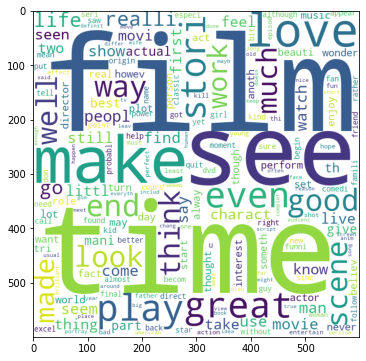

In [132]:
positive_wc = wc.generate(df[df['sentiment'] == 1]['review'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

# Building Model

We are using Bag of words Model. You can also use Tf-idf.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things: A vocabulary of known words. A measure of the presence of known words.

In [133]:
cv = CountVectorizer(max_features=8000,ngram_range=(1,3))

In [134]:
X = cv.fit_transform(df['review'])
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

I am using BernoulliNB algorithm model here. You can check try and test other models as well and choose the model that gives best accuracy and precision score.
```
Other Models that you can use are:
Logistic Regression (if features (variables) are independent )
GaussianNB
MultinomialNB
ExtraTreeClassifier or RandomForestClassifier
```

In [135]:
model = BernoulliNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [136]:
accuracy_score(y_test, y_predict)

0.864

In [137]:
precision_score(y_test, y_predict)

0.8517073170731707

# Examples

In [138]:
def pre_process(txt):
    z = re.sub("[^A-Za-z0-9.]+",  " ",  str(txt))
    z = re.sub(r'[^\w\d\s]', ' ', z)
    z = re.sub(r'\s+', ' ', z)
    z = re.sub(r'^\s+|\s+?$', '', z.lower())
    return ' '.join([ps.stem(term) for term in z.split() if term not in set(StopWords)])

In [43]:
def formatprint(arr):
  transformed = cv.transform( [pre_process(i) for i in arr] )
  prob = model.predict_proba(transformed)

  for i in range(0, len(arr)):
    if prob[i][0] < prob[i][1]:
      print("The review:",arr[i],"\n is","positive and probability that it's a positive review is", round(prob[i][1]*100, 3),"\n\n" )
    else:
      print("The review:",arr[i],"\n is","negative and probability that it's a negative review is", round(prob[i][0]*100, 3),"\n\n" )


In [142]:
arr = ["Movie is good but need little improvements",
       "Awesome, I really love this Movie.",
       "One of my favourite WebSeries. The main lead is somewhat boring but apart from that it's a masterpiece",
       "this film is advertised as a clever romantic comedy. it is neither clever nor romantic and it is definitely not an effective comedy. the fortunes of the well meaning yet pathetic character tom oscillate from one extremely embarrassing disaster to another. the only saving graces are the competent performance by toni collete and the frequency with which we glimpse paltrow s pleasant face. overall to be avoided"]

formatprint(arr)

The review: Movie is good but need little improvements 
 is positive and probability that it's a positive review is 85.108 


The review: Awesome, I really love this Movie. 
 is positive and probability that it's a positive review is 98.884 


The review: One of my favourite WebSeries. The main lead is somewhat boring but apart from that it's a masterpiece 
 is positive and probability that it's a positive review is 95.295 


The review: this film is advertised as a clever romantic comedy. it is neither clever nor romantic and it is definitely not an effective comedy. the fortunes of the well meaning yet pathetic character tom oscillate from one extremely embarrassing disaster to another. the only saving graces are the competent performance by toni collete and the frequency with which we glimpse paltrow s pleasant face. overall to be avoided 
 is negative and probability that it's a negative review is 80.556 




# Deploying using Pickle file

In [141]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(cv, open('vectorizer.pkl','wb'))